<Figure size 1000x600 with 0 Axes>

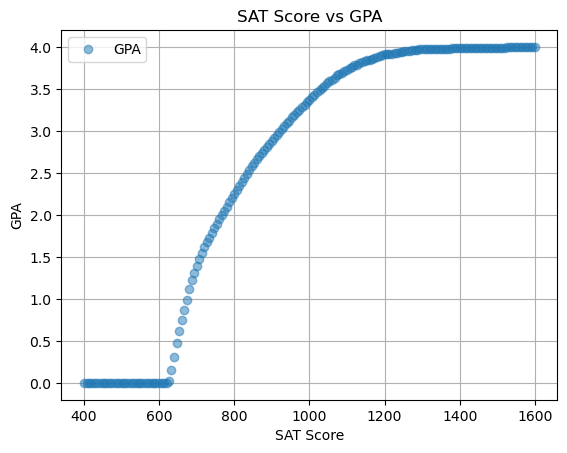

Model Intercept: -1.4820181486437045
Model Coefficient: 0.0041038719430707945

Prediction Results:
    Actual  Predicted  Difference
0     3.99   4.562985   -0.572985
1     3.97   3.935093    0.034907
2     0.00   0.898228   -0.898228
3     3.68   2.950164    0.729836
4     0.15   1.115733   -0.965733
5     3.99   4.673790   -0.683790
6     3.99   4.427557   -0.437557
7     3.83   3.225123    0.604877
8     2.58   1.993961    0.586039
9     2.35   1.854430    0.495570
10    3.28   2.539776    0.740224
11    0.00   0.734073   -0.734073
12    3.82   3.196396    0.623604
13    0.62   1.197810   -0.577810
14    3.97   3.853015    0.116985
15    3.99   4.645063   -0.655063
16    3.95   3.688860    0.261140
17    2.00   1.665652    0.334348
18    3.19   2.457699    0.732301
19    3.93   3.553433    0.376567
20    3.16   2.428972    0.731028
21    2.25   1.801079    0.448921
22    0.48   1.173187   -0.693187
23    3.99   4.263403   -0.273403
24    4.00   4.837945   -0.837945
25    0.00   0.37

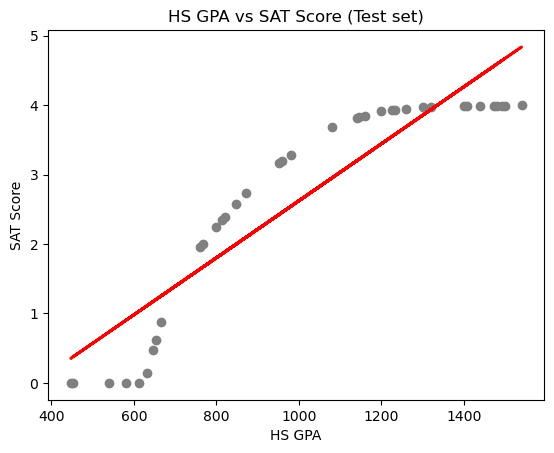

Number of outliers found: 0

Outlier Details:
Empty DataFrame
Columns: [SAT Score, GPA]
Index: []


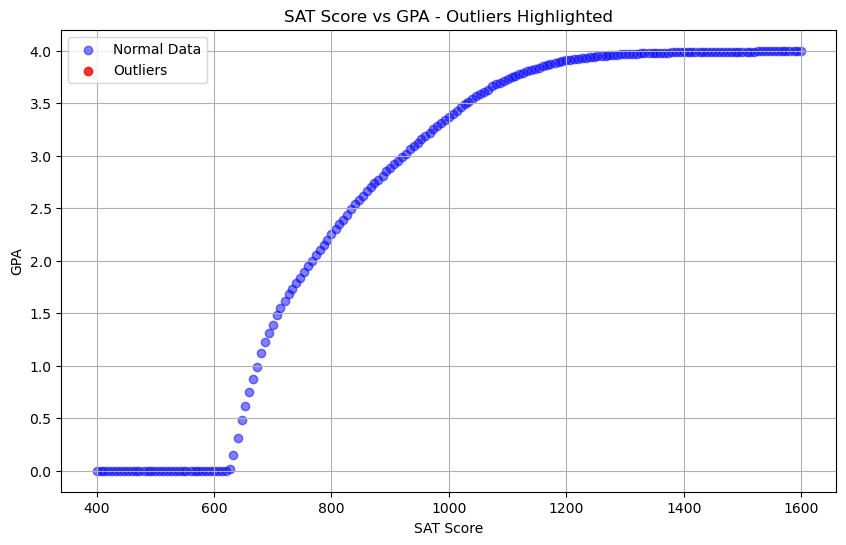


Model Performance Metrics:
Mean Absolute Error: 0.5418494304618653
Mean Squared Error: 0.3429315246803537
Root Mean Squared Error: 0.5856035558979759
R² Score: 0.8511286746794536


In [15]:
import pandas as pd #  for data manipulation
import numpy as np #  for numerical operations
import matplotlib.pyplot as plt #  for plotting
from scipy import stats
from sklearn.model_selection import train_test_split #  for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn import metrics #  for evaluating the model

# Load and explore data
dataset = pd.read_csv("SAT_to_GPA.csv")

# Visualize the data
plt.figure(figsize=(10,6))
dataset.plot(x='SAT Score', y='GPA', style='o', alpha=0.5)
plt.title('SAT Score vs GPA')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.grid(True)
plt.show()


# Prepare features and target
X = dataset[['SAT Score']].values  # Keep as 2D array for sklearn
y = dataset['GPA'].values

dataset.shape
dataset.head()
dataset.describe()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)


# Print model parameters
print('Model Intercept:', regressor.intercept_)
print('Model Coefficient:', regressor.coef_[0])

# Make predictions
y_pred = regressor.predict(X_test)

# Create comparison dataframe
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})
print("\nPrediction Results:")
print(results_df)


plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('HS GPA vs SAT Score (Test set)')
plt.xlabel('HS GPA')
plt.ylabel('SAT Score')
plt.show()

# Find outliers in the data using statistical methods
z_scores = np.abs(stats.zscore(dataset[['SAT Score', 'GPA']]))
outliers = dataset[(z_scores > 3).any(axis=1)]  # Points beyond 3 standard deviations

# Print outlier statistics
print("Number of outliers found:", len(outliers))
print("\nOutlier Details:")
print(outliers)

# Visualize outliers
plt.figure(figsize=(10,6))
plt.scatter(dataset['SAT Score'], dataset['GPA'], c='blue', alpha=0.5, label='Normal Data')
plt.scatter(outliers['SAT Score'], outliers['GPA'], c='red', alpha=0.8, label='Outliers')
plt.title('SAT Score vs GPA - Outliers Highlighted')
plt.xlabel('SAT Score')
plt.ylabel('GPA') 
plt.legend()
plt.grid(True)
plt.show()

# Calculate and display metrics
print('\nModel Performance Metrics:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R² Score:', metrics.r2_score(y_test, y_pred))